#**Recitation Week 7 Solutions**#

Today we will work with some COVID-19 time series data from Our World in Data to practice basic data diagnostics and plotting with ggplot. Go download the covid 19 time series data here: https://ourworldindata.org/coronavirus- source-data. Save to your computer and import into R.

In [ ]:
library(tidyverse)

#first download the data (I opened it in Excel and resaved it as a .csv file
#to make importing faster, but you can also use the function read_excel() or 
#read.xlsx() - check out the documentation for these...), the upload it into
#the collab environment, then copy the path and import
covid <- read_csv("/content/owid-covid-data.csv")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Parsed with column specification:
cols(
  .default = col_double(),
  iso_code = col_character(),
  continent = col_character(),
  location = col_character(),
  date = col_date(format = ""),
  `Death Rate` = col_logical(),
  `Death Pct` = col_logical(),
  new_tests = col_logical(),
  total_tests = col_logical(),
  total_tests_per_thousand = col_logical(),
  new_tests_per_thousand = col_logical(),
  new_tests_smoothed = col_logical(),
  new_tests_smoothed_per_thousand = col_logical(),
  tests_per_case = col_logical(),
  positive_rate = col_logical(),
  tests_units = col_logical()
)

See spec(...) for full col

In [ ]:
head(covid)

iso_code continent     location date       Death Rate Death Pct total_cases
1 ABW      North America Aruba    2020-03-13 NA         NA         2         
2 ABW      North America Aruba    2020-03-19 NA         NA        NA         
3 ABW      North America Aruba    2020-03-20 NA         NA         4         
4 ABW      North America Aruba    2020-03-21 NA         NA        NA         
5 ABW      North America Aruba    2020-03-22 NA         NA        NA         
6 ABW      North America Aruba    2020-03-23 NA         NA        NA         
  new_cases new_cases_smoothed total_deaths ⋯ gdp_per_capita extreme_poverty
1  2           NA               0           ⋯ 35973.78       NA             
2 NA        0.286              NA           ⋯ 35973.78       NA             
3  2        0.286               0           ⋯ 35973.78       NA             
4 NA        0.286              NA           ⋯ 35973.78       NA             
5 NA        0.286              NA           ⋯ 35973.78       NA             
6 NA        0.286              NA           ⋯ 35973.78       NA             
  cardiovasc_death_rate diabetes_prevalence female_smokers male_smokers
1 NA                    11.62               NA             NA          
2 NA                    11.62               NA             NA          
3 NA                    11.62               NA             NA          
4 NA                    11.62               NA             NA          
5 NA                    11.62               NA             NA          
6 NA                    11.62               NA             NA          
  handwashing_facilities hospital_beds_per_thousand life_expectancy
1 NA                     NA                         76.29          
2 NA                     NA                         76.29          
3 NA                     NA                         76.29          
4 NA                     NA                         76.29          
5 NA                     NA                         76.29          
6 NA                     NA                         76.29          
  human_development_index
1 NA                     
2 NA                     
3 NA                     
4 NA                     
5 NA                     
6 NA

In [ ]:
str(covid)

tibble [48,380 × 43] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ iso_code                       : chr [1:48380] "ABW" "ABW" "ABW" "ABW" ...
 $ continent                      : chr [1:48380] "North America" "North America" "North America" "North America" ...
 $ location                       : chr [1:48380] "Aruba" "Aruba" "Aruba" "Aruba" ...
 $ date                           : Date[1:48380], format: "2020-03-13" "2020-03-19" ...
 $ Death Rate                     : logi [1:48380] NA NA NA NA NA NA ...
 $ Death Pct                      : logi [1:48380] NA NA NA NA NA NA ...
 $ total_cases                    : num [1:48380] 2 NA 4 NA NA NA 12 17 19 28 ...
 $ new_cases                      : num [1:48380] 2 NA 2 NA NA NA 8 5 2 9 ...
 $ new_cases_smoothed             : num [1:48380] NA 0.286 0.286 0.286 0.286 ...
 $ total_deaths                   : num [1:48380] 0 NA 0 NA NA NA 0 0 0 0 ...
 $ new_deaths                     : num [1:48380] 0 NA 0 NA NA NA 0 0 0 0 ...
 $ new_deaths_smoothed   

#1) What are data diagnostics? Why is important to diagnose issues in your data before you plot?

Data diagnostics are just what they sound like: running diagnostics on your data to make sure you know what you are plotting before you make a chart. For example, you want to know - do you have full data? are there weird values in your data? do you have all the variables you need?

I want to make sure I have data on each country for the same set of days - that way they are comparable.

In [ ]:
country_freq <- covid %>% count(location)
country_freq

location                        n  
1   Afghanistan                     281
2   Albania                         212
3   Algeria                         281
4   Andorra                         213
5   Angola                          199
6   Anguilla                        194
7   Antigua and Barbuda             201
8   Argentina                       239
9   Armenia                         281
10  Aruba                           203
11  Australia                       281
12  Austria                         281
13  Azerbaijan                      281
14  Bahamas                         203
15  Bahrain                         281
16  Bangladesh                      218
17  Barbados                        203
18  Belarus                         281
19  Belgium                         281
20  Belize                          197
21  Benin                           204
22  Bermuda                         201
23  Bhutan                          210
24  Bolivia                         209
25  Bonaire Sint Eustatius and Saba 188
26  Bosnia and Herzegovina          210
27  Botswana                        189
28  Brazil                          281
29  British Virgin Islands          194
30  Brunei                          210
⋮   ⋮                               ⋮  
183 Swaziland                       206
184 Sweden                          277
185 Switzerland                     281
186 Syria                           198
187 Taiwan                          281
188 Tajikistan                      159
189 Tanzania                        204
190 Thailand                        281
191 Timor                           199
192 Togo                            217
193 Trinidad and Tobago             208
194 Tunisia                         213
195 Turkey                          207
196 Turks and Caicos Islands        196
197 Uganda                          199
198 Ukraine                         212
199 United Arab Emirates            281
200 United Kingdom                  281
201 United States                   281
202 United States Virgin Islands    197
203 Uruguay                         206
204 Uzbekistan                      205
205 Vatican                         209
206 Venezuela                       206
207 Vietnam                         281
208 Western Sahara                  164
209 World                           281
210 Yemen                           180
211 Zambia                          202
212 Zimbabwe                        200

This table shows me how many observations there are for each country. Since the table has 212 rows that means there are 212 countries in the dataset. Apparently not all countries have data for the same set of days (some of them have as many as 281 days others as few as 180). This could be an issue if we want to compare two countries. For example if we calculate an a total number of deaths for the United States and for Yemen, the total for the US will represent the total over more days than the total for Yemen.

In [ ]:
country_freq %>% filter(n==max(n))

location             n  
1  Afghanistan          281
2  Algeria              281
3  Armenia              281
4  Australia            281
5  Austria              281
6  Azerbaijan           281
7  Bahrain              281
8  Belarus              281
9  Belgium              281
10 Brazil               281
11 Cambodia             281
12 Canada               281
13 China                281
14 Croatia              281
15 Czech Republic       281
16 Denmark              281
17 Dominican Republic   281
18 Ecuador              281
19 Egypt                281
20 Estonia              281
21 Finland              281
22 France               281
23 Georgia              281
24 Germany              281
25 Greece               281
26 Iceland              281
27 India                281
28 Indonesia            281
29 International        281
30 Iran                 281
⋮  ⋮                    ⋮  
37 Lebanon              281
38 Lithuania            281
39 Luxembourg           281
40 Macedonia            281
41 Malaysia             281
42 Mexico               281
43 Monaco               281
44 Nepal                281
45 Netherlands          281
46 New Zealand          281
47 Nigeria              281
48 Norway               281
49 Oman                 281
50 Pakistan             281
51 Philippines          281
52 Qatar                281
53 Romania              281
54 Russia               281
55 San Marino           281
56 Singapore            281
57 South Korea          281
58 Sri Lanka            281
59 Switzerland          281
60 Taiwan               281
61 Thailand             281
62 United Arab Emirates 281
63 United Kingdom       281
64 United States        281
65 Vietnam              281
66 World                281

There are 66 countries that appear to have full data - this list of 66 countries all have data for all 281 days since early march. 

#2) Is this data wide or long?

This data is in long format since each row corresponds to one 'observation' - i.e. one country on one day - and each column corresponds to one 'variable' - i.e. number of deaths, population size, number of tests etc - and each cell corresponds to one 'value' - i.e. 12 or 320million.

Moreover it is in the format we will need in order to easily make plots since each variable we want to compare is listed in a separate column.

#3) What are you curious about in this data? What plots would you make to investigate your questions?

This is a very open ended question and there's no specific answer to it. Here are some things I was curious about:
- Given each countries' different responses to the pandemic, I wonder if the virus spread faster and wider in some countries than others?
- Did the virus spread exponentially? Uniformly? If there are times when the rate of its spread changes, can those be related to points in time when institutional responses were instigated?
- Also, was it more deadly in some places than others?
- Does the spread and deadliness seem to be related to health factors of each country as a whole?


Here are some of the plots I would make in order to investigate the above questions:
- plot total cases by day for multiple countries of interest (may need a log version as well)
- add vertical lines for institution of stay at home order, mandatory masks, shut-down etc.
- calculate the percentage of positive tests that resulted in death and plot that over time for multiple countries of interest
- create versions of the two above plots adding in ```median_age```, ```gdp_per_capita```, ```extreme_poverty``` (and many more) as factors to compare between countries. 

#4) Make a line plot of total cases by day - have one line for the US, one for South Korea, and one for all of Europe (hint: you may need to make a lookup for european countries to do this part)

In [ ]:
#luckily we can use the ```continent``` variable to aggregate the data for Europe
#so we don't need to make our own lookup
covid_continent <- covid %>% group_by(continent,date) %>% 
    summarise(total_cases = sum(total_cases,na.rm=T),
              total_deaths = sum(total_deaths,na.rm=T),
              population = sum(population)) %>%
    mutate(location=continent) 

head(covid_continent)

`summarise()` regrouping output by 'continent' (override with `.groups` argument)



continent date       total_cases total_deaths population location
1 Africa    2019-12-31 0           0            352325033  Africa  
2 Africa    2020-01-01 0           0            352325033  Africa  
3 Africa    2020-01-02 0           0            352325033  Africa  
4 Africa    2020-01-03 0           0            352325033  Africa  
5 Africa    2020-01-04 0           0            352325033  Africa  
6 Africa    2020-01-05 0           0            352325033  Africa

In [ ]:
#now we need to append this onto our original dataset and filter to only the 
#countries / continents of interest
covid_agg <- bind_rows(covid,covid_continent) %>% 
    filter(location %in% c("United States","South Korea","Europe"))

head(covid_agg)

iso_code continent location    date       Death Rate Death Pct total_cases
1 KOR      Asia      South Korea 2019-12-31 NA         NA        0          
2 KOR      Asia      South Korea 2020-01-01 NA         NA        0          
3 KOR      Asia      South Korea 2020-01-02 NA         NA        0          
4 KOR      Asia      South Korea 2020-01-03 NA         NA        0          
5 KOR      Asia      South Korea 2020-01-04 NA         NA        0          
6 KOR      Asia      South Korea 2020-01-05 NA         NA        0          
  new_cases new_cases_smoothed total_deaths ⋯ gdp_per_capita extreme_poverty
1 0         NA                 0            ⋯ 35938.37       0.2            
2 0         NA                 0            ⋯ 35938.37       0.2            
3 0         NA                 0            ⋯ 35938.37       0.2            
4 0         NA                 0            ⋯ 35938.37       0.2            
5 0         NA                 0            ⋯ 35938.37       0.2            
6 0         NA                 0            ⋯ 35938.37       0.2            
  cardiovasc_death_rate diabetes_prevalence female_smokers male_smokers
1 85.998                6.8                 6.2            40.9        
2 85.998                6.8                 6.2            40.9        
3 85.998                6.8                 6.2            40.9        
4 85.998                6.8                 6.2            40.9        
5 85.998                6.8                 6.2            40.9        
6 85.998                6.8                 6.2            40.9        
  handwashing_facilities hospital_beds_per_thousand life_expectancy
1 NA                     12.27                      83.03          
2 NA                     12.27                      83.03          
3 NA                     12.27                      83.03          
4 NA                     12.27                      83.03          
5 NA                     12.27                      83.03          
6 NA                     12.27                      83.03          
  human_development_index
1 0.903                  
2 0.903                  
3 0.903                  
4 0.903                  
5 0.903                  
6 0.903

In [ ]:
#a quick check to make sure everything is going right
covid_agg %>% count(location)

location      n  
1 Europe        281
2 South Korea   281
3 United States 281

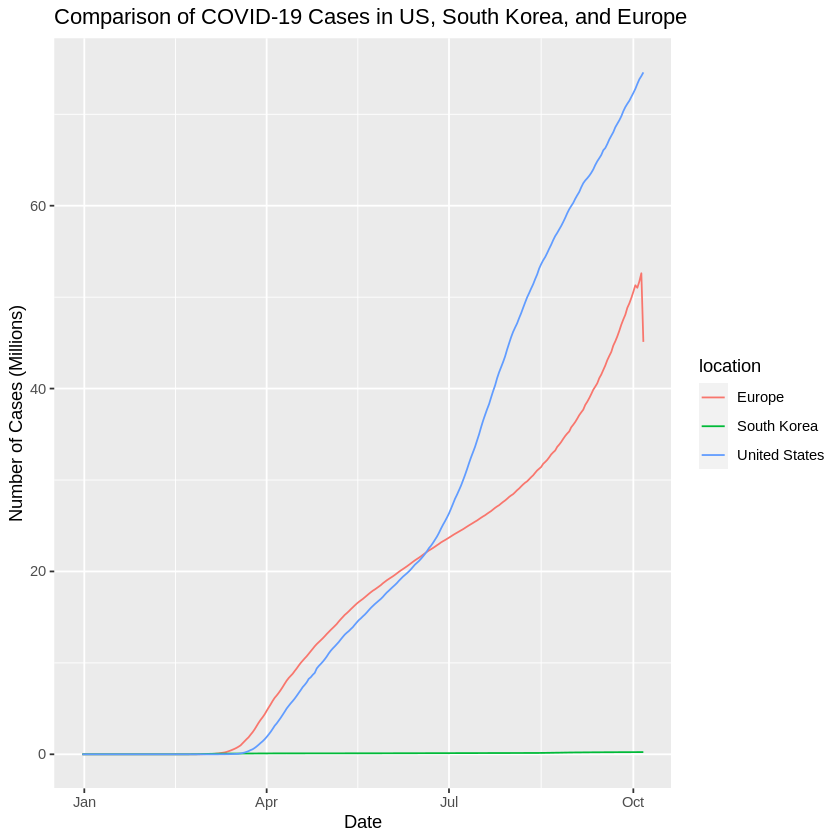

In [ ]:
ggplot(covid_agg) +
  geom_line(mapping = aes(x = date, y = total_cases/100000, color = location)) +
  labs(title = "Comparison of COVID-19 Cases in US, South Korea, and Europe",
       x = "Date",
       y = "Number of Cases (Millions)")

This chart doesn't really work very well because the US and Europe have rates on a whole different scale than South Korea (tens of millions versus hundreds of thousands). In order to plot these both on the same scale we can take the natural log of each time series and re-plot. This will show the 'exponential growth rate' of total cases in each region.

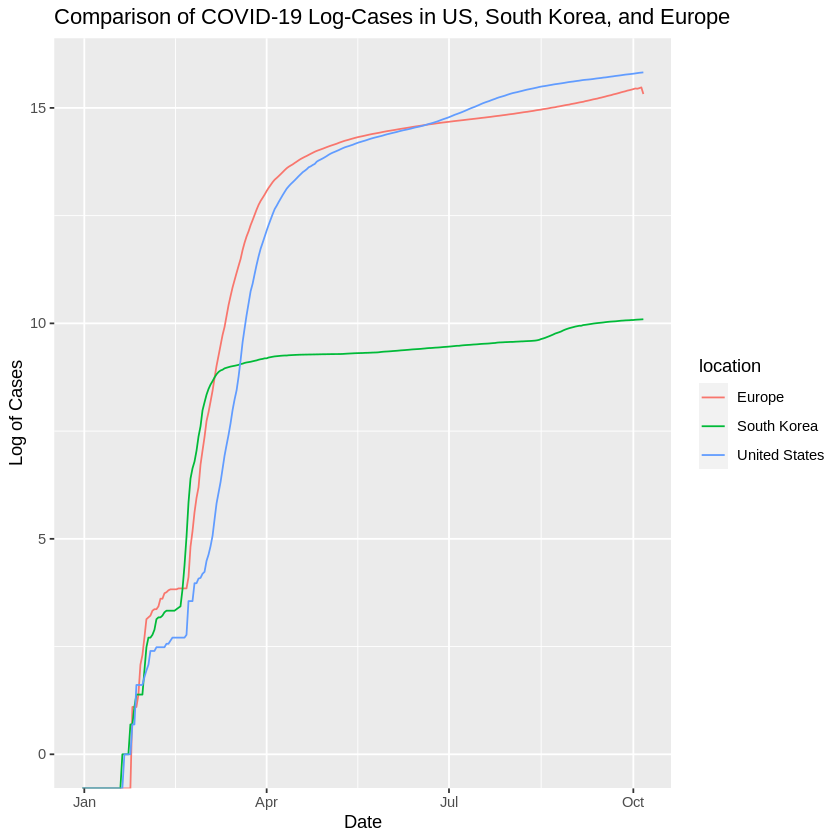

In [ ]:
ggplot(covid_agg) +
  geom_line(mapping = aes(x = date, y = log(total_cases), color = location)) +
  labs(title = "Comparison of COVID-19 Log-Cases in US, South Korea, and Europe",
       x = "Date",
       y = "Log of Cases")

This is a much more informative chart. We can now compare the spread of cases in the US, in Europe, and in South Korea. Additionally, we have a picture of how the virus spreads in general, and can investigate how institutional reactions affect its spread. 
- First off, its clear that the virus spread first in South Korea and Europe then in the US. We can see this since the red and green lines spike before blue line.
- Second, it looks like the spread was much more contained in South Korea than in Europe or the US. The exponential growth rate there topped out at 10 while in the west its surpassed 15. To get a sense of how big that difference is, compare e^10 which is approximately 22,000 to e^15 which is approximately 326,000,000. There are many possible explanations for this - it could be that South Korea's policies were more effective, or it could be that south Korea's smaller population simply saturated faster. 
- Lastly, it is interesting to note there is a hitch in the exponential growth in late february / early march. This corresponds to the time when the most strict counter-virus measures were put in place. 

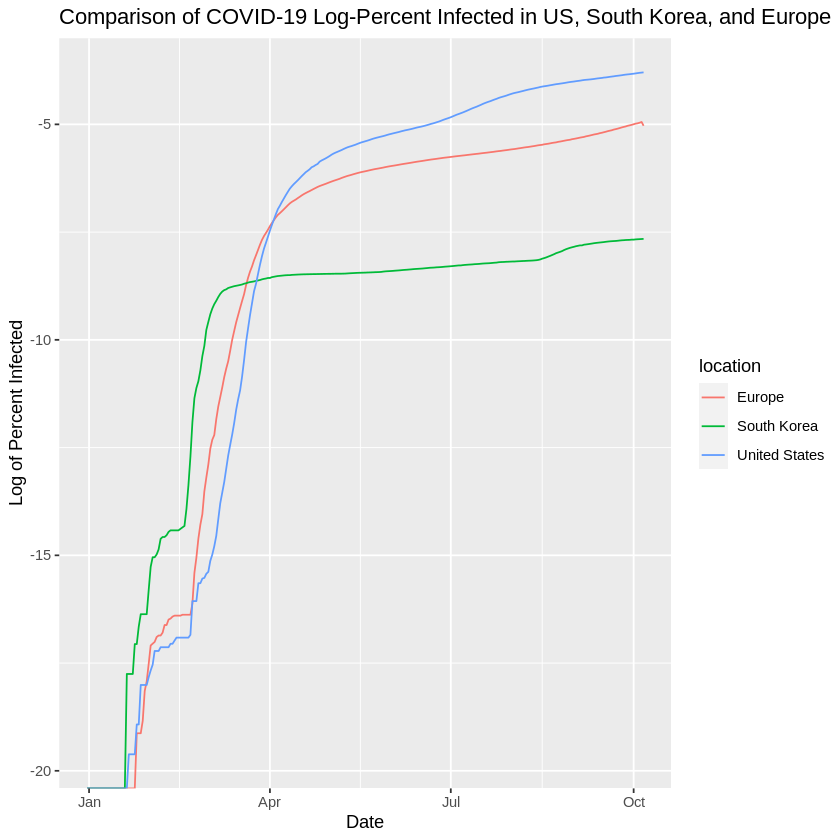

In [ ]:
# by dividing the total cases by population size we get percent infected
ggplot(covid_agg) +
  geom_line(mapping = aes(x = date, y = log(total_cases/population), color = location)) +
  labs(title = "Comparison of COVID-19 Log-Percent Infected in US, South Korea, and Europe",
       x = "Date",
       y = "Log of Percent Infected")

This chart shows the log of percent infected in each location. Comparing this to the previous chart it is clear that South Korea's smaller population was partially responsible for slowing the spread there. However, the main difference is still present. This means population size alone does not account for the full discrepancy between the spread of the virus in South Korea versus Europe and the US.